# Predicting the Profit

## Importing the basic required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

# Reading the data from csv file

In [2]:
data = pd.read_csv('50_Startups.csv')

### Analyze data

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
data.shape

(50, 5)

### Visulaize data

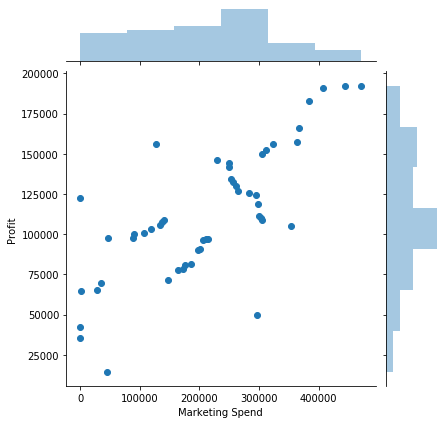

In [9]:
sns.jointplot(x='Marketing Spend',y='Profit',data=data)

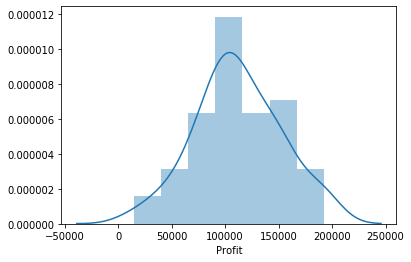

In [10]:
sns.distplot(data['Profit'])

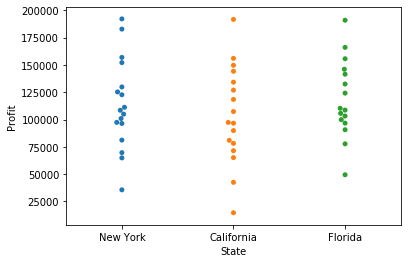

In [11]:
sns.swarmplot(x='State',y='Profit',data=data)

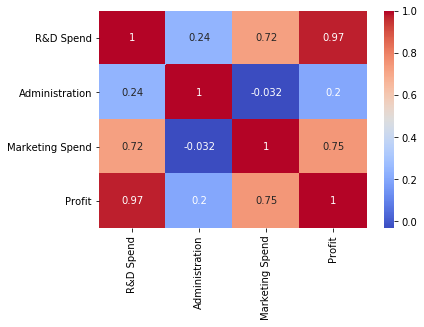

In [12]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

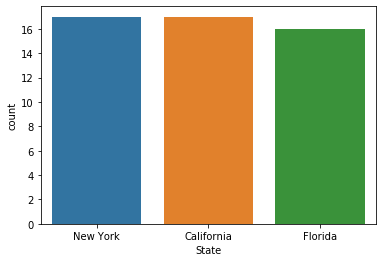

In [13]:
sns.countplot(data['State'])

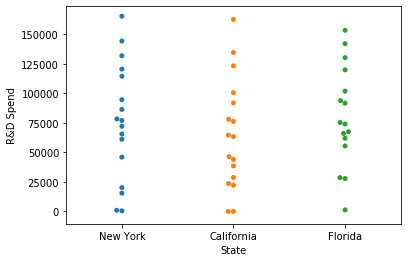

In [14]:
sns.swarmplot(x='State',y='R&D Spend',data=data)

### Cleaning the data

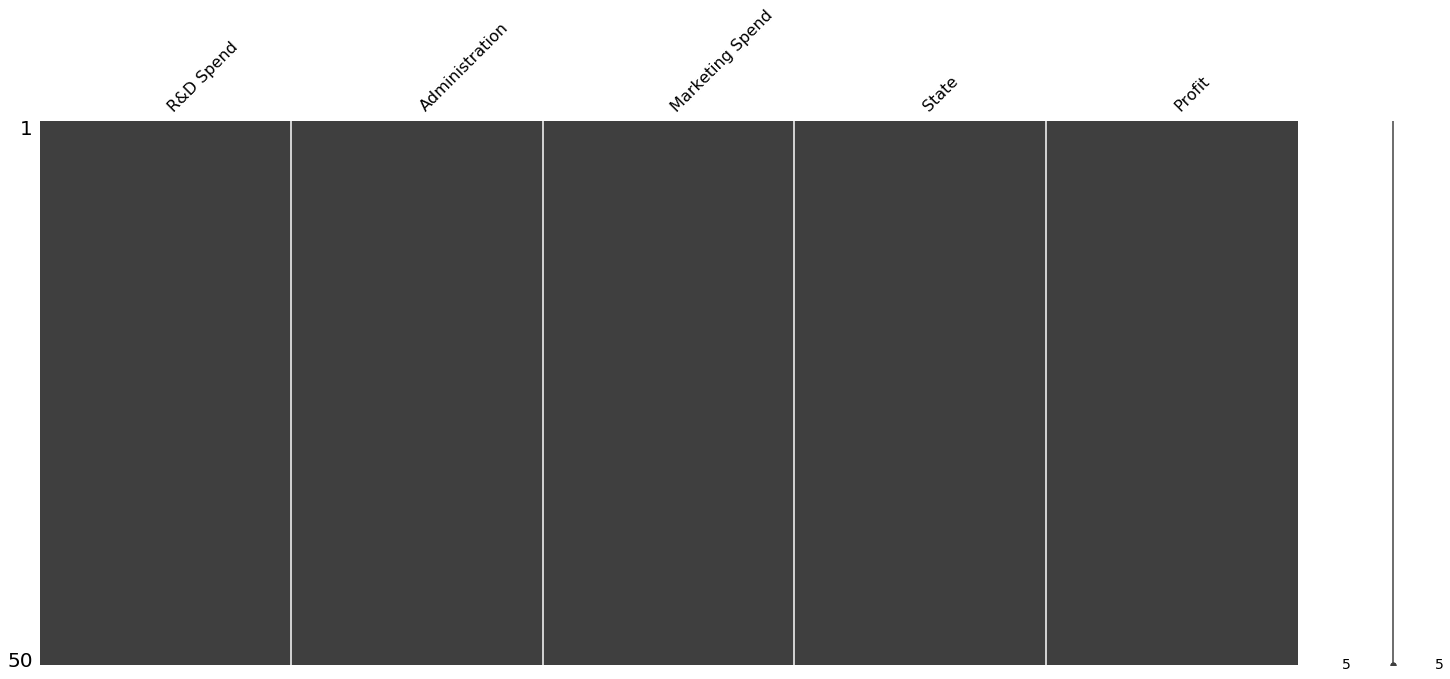

In [15]:
ms.matrix(data)

### Categorical Value Converison

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
x = data.drop('Profit',axis=1)
y = data['Profit']

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [21]:
print(x[0])

[0.000000e+00 0.000000e+00 1.000000e+00 1.653492e+05 1.368978e+05
 4.717841e+05]


### Training dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [24]:
X_train.shape

(35, 6)

In [25]:
X_test.shape

(15, 6)

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
regressor = DecisionTreeRegressor(random_state=0)

In [29]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

###  Predicting the model on the test set


In [30]:
Y_pred_test = regressor.predict(X_test)

### Results

In [31]:
Y_test = np.array(Y_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred_test.reshape(len(Y_pred_test),1),Y_test.reshape(len(Y_test),1)),1))


[[ 96479.51  89949.14]
 [152211.77 132602.65]
 [118474.03 111313.02]
 [107404.34  97427.84]
 [108733.99 110352.25]
 [192261.83 191792.06]
 [118474.03 105733.54]
 [ 35673.41  49490.75]
 [ 77798.83  71498.49]
 [ 14681.4   42559.73]
 [118474.03 126992.93]
 [118474.03 108552.04]
 [156991.12 155752.6 ]
 [ 35673.41  64926.08]
 [134307.35 124266.9 ]]


### R-squared score

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(Y_test,Y_pred_test)

0.8678574299294524